In [31]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

transform = transforms.Compose([transforms.ToTensor()])

dataset = datasets.MNIST('.data', train=False, download=True,transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

for img, labels in dataloader:
    break
    

In [43]:
num_measurements= [10, 15, 25, 35, 50, 75, 100]

rec_error = np.zeros((len(num_measurements), 100))
for i,m in enumerate(num_measurements):
    for j, (img, labels) in enumerate(dataloader):
        img = img.view(1,-1).numpy()
        rec = plt.imread('./{0}/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/{1}.png'.format(m,j))
        rec_error[i,j] = 4*np.linalg.norm(rec.ravel()-img)**2/784.
        if j==99:
            break

<Container object of 3 artists>

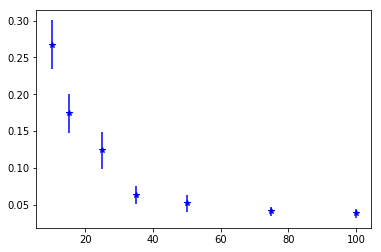

In [44]:
plt.errorbar(num_measurements,np.mean(rec_error, axis=1),yerr=2*np.std(rec_error, axis=1)/10.,fmt='b*')